<a href="https://colab.research.google.com/github/Leticiapp/MVP_Analise_de_dados/blob/main/MVP_Analise_de_dados_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**
Pontifícia Universidade Católica do Rio de Janeiro

Curso: Ciência de Dados e Analytis

Aluno: Leticia Paumer


## 1. Definição do Problema

Para o desenvolvimento do MVP foram utilizados **dados de uma campanha de marketing de uma instituição bancária portuguesa**. As campanhas de marketing para a venda de produtos são baseadas em chamadas telefônicas. Muitas vezes, mais de um contato com o mesmo cliente era necessário para verificar se o produto será aceito pelo cliente ou não. A fonte original do dataset está disponível em: https://archive.ics.uci.edu/dataset/222/bank+marketing

O objetivo do projeto é prever se o cliente irá adquirir o produto da campanha de marketing atual, baseando-se nos dados pessoais e de crédito do cliente, e em informações de campanhas anteriores e da campanha atual. O problema abordado neste projeto trata-se de um aprendizado não supervisionado, pois o dataset não fornece as saídas a serem estimadas.



**As informações sobre os atributos do dataset são:**

Dados pessoais do cliente do banco:
1. **age** - Idade do cliente.

2. **job** - Ocupação do cliente (categorizado em:
"admin." = "adiministração,
"unknown" = "desconhecido",
"unemployed" = "desempregado",
"management" = "gestão",
"housemaid" = "empregada doméstica",
"entrepreneur" = "empreendedor",
"student" = "estudante",
"blue-collar" = "colarinho azul",
"self-employed" = "autônomo",
"retired" = "aposentado",
"technician" = "técnico",
"services" = "serviços").

3. **marital** - Estado cívil (categorizado em:
"married" = casado,
"divorced" = divorciado,
"single" = solteiro).
Observação: "divorced" pode significar divorciado ou viúvo.

4. **education** - Nível de escolaridade (categorizado em:
"unknown" = desconhecido,
"secondary" = secundário,
"primary" = primário,
"tertiary" = terciário).

5. **default**: Possui crédito em inadimplência (campo binário "yes" = sim ou "no" = não).

6. **balance**: Saldo médio anual, em euros.

7. **housing**: Possui financiamento imobiliário (campo binário "yes" = sim ou "no" = não).

8. **loan**: Possui empréstimo pessoal (campo binário "yes" = sim ou "no" = não).

Dados do último contato da campanha atual com o cliente:
9. **contact**: Tipo de comunicação (categorizado em:
"unknown" = desconhecido,
"telephone" = telefone,
"cellular" = celular) .

10. **day**: Dia do mês do último contato.

11. **month**: Mês do último contato (categorizado em: "jan", "feb", "mar", ..., "nov", "dec").

12. **duration**: Duração do último contato, em segundos.

Demais atributos:

13. **campaign**: Número de contatos realizados durante a campanha atual.

14. **pdays**: Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (Observação: -1 significa que o cliente não foi contatado anteriormente).

15. **previous**: Número de contatos realizados antes da campanha atual.

16. **poutcome**: Resultado da campanha de marketing anterior (categorizado em:
"unknown" = desconhecido,
"other" = outro,
"failure" = fracasso,
"success" = sucesso).



In [89]:
#Imports de pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as ms

In [90]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga dos Dados

Para carregar o dataset do projeto, é utilizado o pacote Pandas (Python Data Analysis Library).

In [91]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/Leticiapp/MVP_Analise_de_dados/main/data/bank-full.csv"

# Colunas do dataset
colunas = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Leitura do arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')


In [92]:
# Visualização das primeiras linhas do dataset
dataset.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown

## 3. Análise de Dados

### 3.1 Estatísticas Descritivas

O objetivo dessa seção é obter uma visão geral e simplificada das propriedades fundamentais do dataset, a fim de compreender sua distribuição, dispersão e tendências centrais. Serão analisadas informações de cada variável e também o resumo estatístico do dataset.


In [93]:
#Dimensões do dataset (linhas x colunas)
dataset.shape

(45211, 16)

Podemos observar que o dataset possui 16 colunas e 45211 registros.

In [94]:
#Quantidade de registros em cada coluna do dataset
dataset.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
dtype: int64

Inicialmente, podemos observar que não há missings no dataset. Porém, posteriormente serão realizadas verificações mais aprofundadas para confimar se todos os registros estão preenchidos com informações válidas.

In [95]:
# Visualização das primeiras 10 linhas do dataset
dataset.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown  
5  unknown    5   may       139         1     -1         0  unknown  
6  unknown    5   may       217         1     -1         0  unknown  
7  unknown    5   may       380         1     -1         0  unknown  
8  unknown    5   may        50         1     -1         0  unknown  
9  unknown    5   may        55         1     -1         0  unknown

In [96]:
# Visualização das 10 últimas linhas do dataset
dataset.tail(10)

age           job   marital  education default  balance housing loan  \
45201   53    management   married   tertiary      no      583      no   no   
45202   34        admin.    single  secondary      no      557      no   no   
45203   23       student    single   tertiary      no      113      no   no   
45204   73       retired   married  secondary      no     2850      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
45201   cellular   17   nov       226         1    184         4  success  
45202   cellular   17   nov       224         1     -1         0  unknown  
45203   cellular   17   nov       266         1     -1         0  unknown  
45204   cellular   17   nov       300         1     40         8  failure  
45205   cellular   17   nov       386         2     -1         0  unknown  
45206   cellular   17   nov       977         3     -1         0  unknown  
45207   cellular   17   nov       456         2     -1         0  unknown  
45208   cellular   17   nov      1127         5    184         3  success  
45209  telephone   17   nov       508         4     -1         0  unknown  
45210   cellular   17   nov       361         2    188        11    other

Observando as primeiras e as últimas linhas do dataset, as informações aparentam ser consistentes, e o campos estão preenchidos de forma correta.


Abaixo podemos visualizar o tipo de dado de cada atributo:


In [97]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB
None


In [98]:
dataset.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Acima, com o comando describe, podemos visualizar o resumo estatístico para cada uma das variáveis quantitativas. Os valores apresentados são: média (mean), desvio padrão (std), mínimo (min), máximo (max) e os quartis.

Algumas das informações relevantes que podemos observar são:

1. A idade média dos clientes do banco é de aproximadamente 40 anos.
2. Há uma notável discrepância entre o saldo anual mínimo e máximo do dataset. Nota-se também que há clientes com saldo negativo no banco.
3. Há registros de ligações com duração de 0 segundos.
4. Não houve contato de companhas anteriores com pelo menos 75% dos clientes.


In [99]:
# distribuição do atributo poutcome (Resultado da campanha de marketing anterior)
print(dataset.groupby('poutcome').size())

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


Ao observar a distribuição do atributo poutcome (resultado da campanha de marketing anterior), vemos que a maior parte do dataset possuí o campo preenchido com unknown (desconhecido).

### 3.2 Visualizações Unimodais

Nessa seção iremos analisar individualmente cada atributo do conjunto de dados de forma gráfica.

#### 3.2.1 Variáveis quantitativas

Inicialmente, iremos gerar um gráfico geral com histogramas e gráficos de densidade para todos os atributos do dataset, e em sequência analisaremos alguns deles de forma indivídual.

Ao observar os histogramas, vemos que o atributos balance, duration, campaign, pdays e previous seguem uma distribuição exponencial. A coluna age segue uma distribuíção aproximadamente normal, e a coluna day apresenta uma distribuíção aproximadamente uniforme.

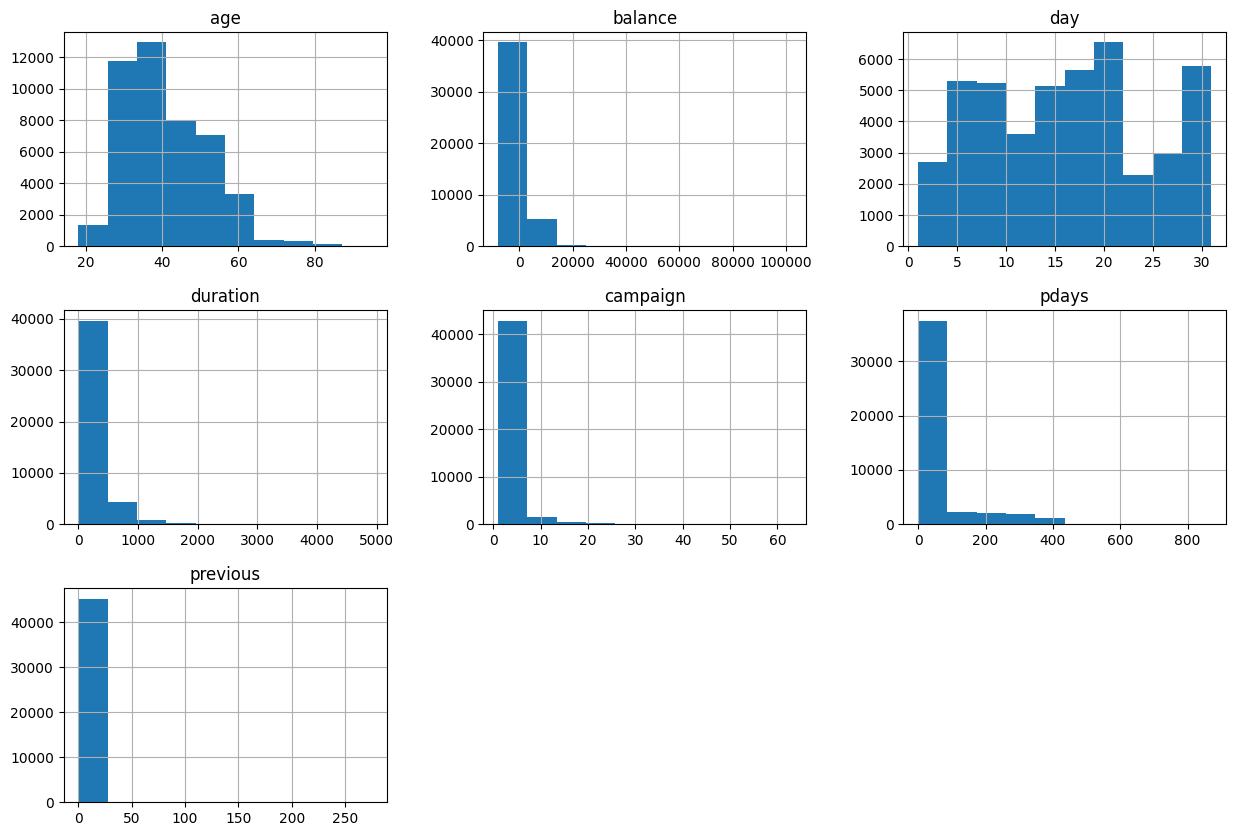

In [100]:
#Histograma geral
dataset.hist(figsize = (15,10))
plt.show()


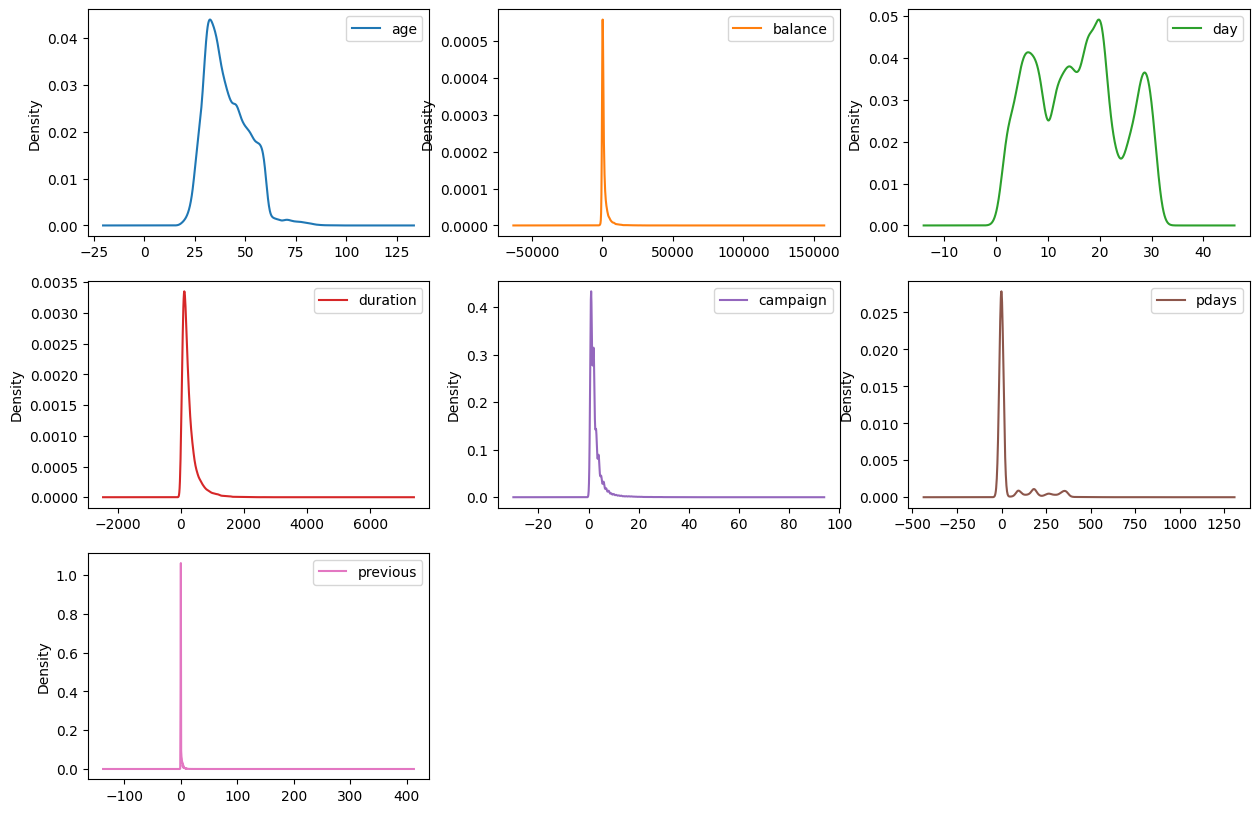

In [101]:
#Gráfico de densidade
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

A seguir, geraremos um histograma com linha de densidade para a coluna 'idade' do dataset, a fim de obter uma melhor visualização deste atributo.

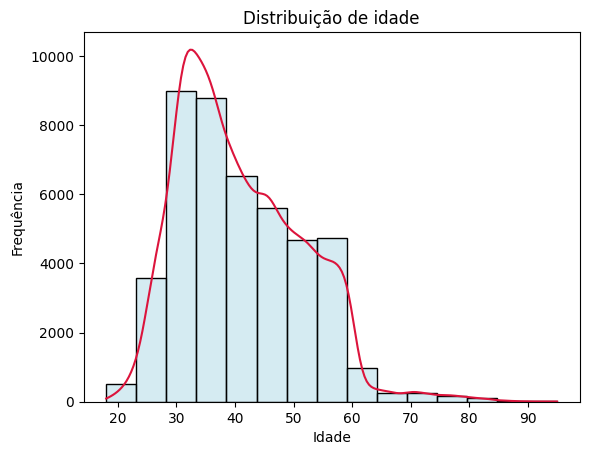

In [102]:
#Histograma de idade de todos os clientes do banco

#criando um dataframe com apenas a coluna idade do dataset
X = dataset['age']

#geração do histograma
ax = sns.histplot(X, kde=True, bins=15, color='lightblue')
ax.lines[0].set_color('crimson')

#incluindo título do gráfico e lendenda
plt.title('Distribuição de idade')
plt.ylabel('Frequência')
plt.xlabel('Idade');
plt.show()


Para os atributos 'balance' e 'duration', iremos gerar um boxplot, para representar de forma gráfica a distribuição estatística dessas colunas.
Neste tipo de gráfico podemos identificar:
1. Mediana: O segmento dentro da "caixa".
2. Variação e Dispersão: A extensão da caixa (interquartil) mostra a dispersão dos dados, enquanto a "linha dos bigodes" (whiskers) representa a amplitude dos dados.
3. Outliers: Pontos fora dos limites dos bigodes são considerados outliers, o que pode indicar valores extremos ou discrepâncias nos dados.


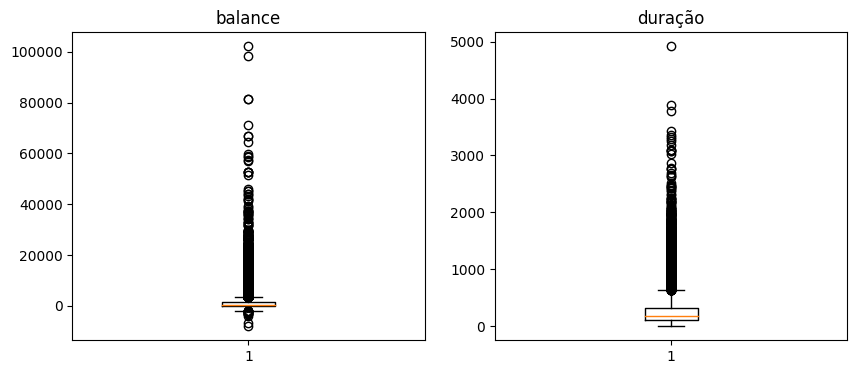

In [103]:
#Boxplots

#configurando um grupo de subplots de um grid de 1 linha e 2 colunas e também o tamanho da figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 4))

#subplot1: boxplot de duration
ax[1].boxplot(dataset['duration'])
ax[1].set_title("duração")

#subplot2: boxplot de balance
ax[0].boxplot(dataset['balance'])
ax[0].set_title("balance")

fig.show();


A partir do boxplot, podemos visualizar a presença de vários pontos de outliers, o que pode indicar a necessidade que algum tipo de tratamento para esses dados posteriormente.

#### 3.2.2 Variáveis qualitativas

Nessa seção iremos analisar gráficamente a distribuíção das variáveis qualitativas do dataset.
Iremos iniciar com os atribuitos de informações pessoais dos clientes.

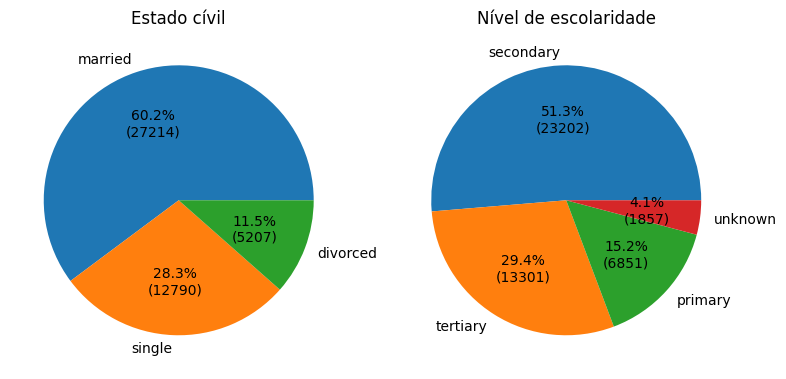

In [104]:
#Gráfico de pizza

#função para geração do gráfico
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


#criação de dataframes indivíduais para os atributos martial e education
df_married = dataset['marital'].value_counts()
df_education = dataset['education'].value_counts()

#configurando um grupo de subplots de um grid de 1 linha e 2 colunas e também o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

#geração dos gráficos
axes[0].pie(df_married,labels = df_married.index, autopct=autopct_format(df_married))
axes[0].set_title('Estado cívil')

axes[1].pie(df_education,labels = df_education.index, autopct=autopct_format(df_education))
axes[1].set_title('Nível de escolaridade')

fig.tight_layout()


Visualizando os gráficos de pizza acima, observamos que aproximadamente 60% dos clientes do banco são casados, e aproximadamente 51% dos clientes possuem nível secundário de escolaridade. Podemos também observar as demais distribuíções desses atributos.

Em seguida, criaremos um gráfico de barras horizontais para visualização das áreas de atuação dos clientes.

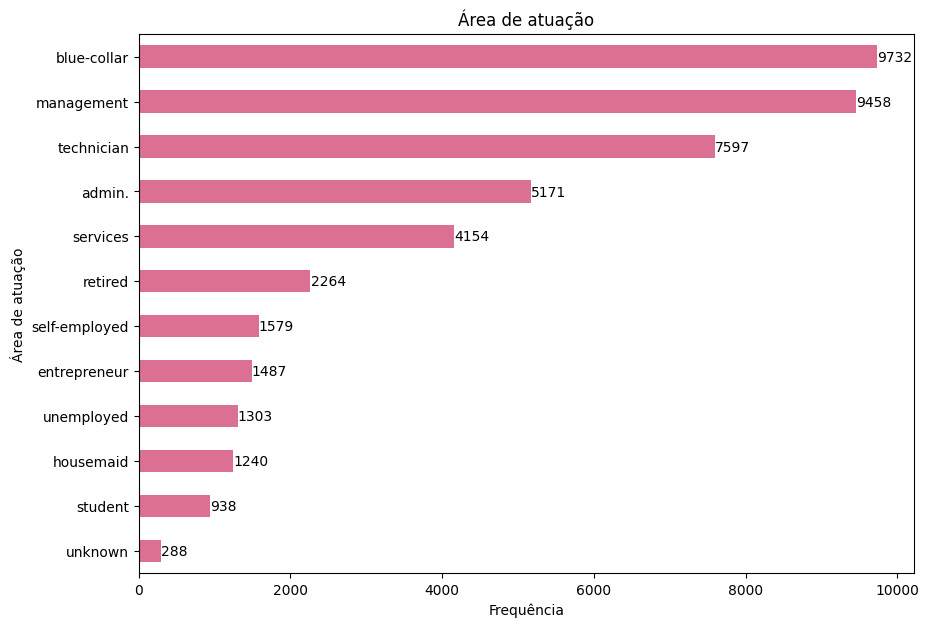

In [105]:
#Gráfico de barras

#Geração do gráfico de barras
ax = dataset['job'].value_counts().plot(kind='barh',
                                    figsize=(10,7),
                                    color='palevioletred',
                                    title="Área de atuação")

#ordena as barras em ordem decrescente
ax.invert_yaxis()

#labels
ax.set_xlabel("Frequência")
ax.set_ylabel("Área de atuação")

#adiciona o valor no final de cada barra
for i, v in enumerate(dataset['job'].value_counts()):
    ax.text(v + 3, i + .1, str(v),
            color = 'black')

A partir do gráfico, podemos visualizar de forma ordenada a distribuição das áreas de atuação dos clientes. As áreas mais frequêntes neste dataset são: colarinho azul, gestão e técnico.

Para analisarmos as informações de crédito e de dívidas dos clientes, iremos gerar três novos gráficos de pizza:

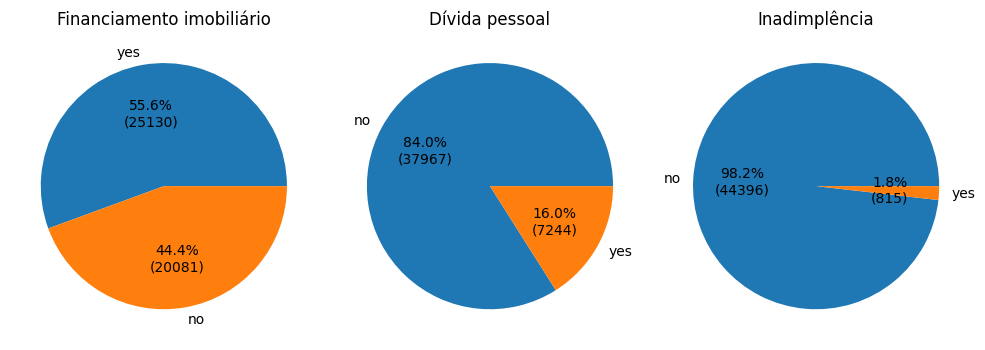

In [106]:
#Gráfico de pizza

#função para geração do gráfico
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


#criação de dataframes indivíduais para os atributos housing, loan e default
df_housing = dataset['housing'].value_counts()
df_loan = dataset['loan'].value_counts()
df_default = dataset['default'].value_counts()

#configurando um grupo de subplots de um grid de 1 linha e 3 colunas e também o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

#geração dos gráficos
axes[0].pie(df_housing,labels = df_housing.index, autopct=autopct_format(df_housing))
axes[0].set_title('Financiamento imobiliário')

axes[1].pie(df_loan,labels = df_loan.index, autopct=autopct_format(df_loan))
axes[1].set_title('Dívida pessoal')

axes[2].pie(df_default,labels = df_default.index, autopct=autopct_format(df_default))
axes[2].set_title('Inadimplência')

fig.tight_layout()

Observando a distribuição a partir dos gráficos acima, notamos que aproximadamente 55% dos clientes possuem financiamento imobiliário, 16% possuem dívida pessoal e apenas 1,8% dos clientes estão em inadimplência.

Em seguida, faremos a analise da fequência das últimas ligações durante a campanha de marketing atual para cada mês do ano, utilizando um gráfico de barras horizontal:

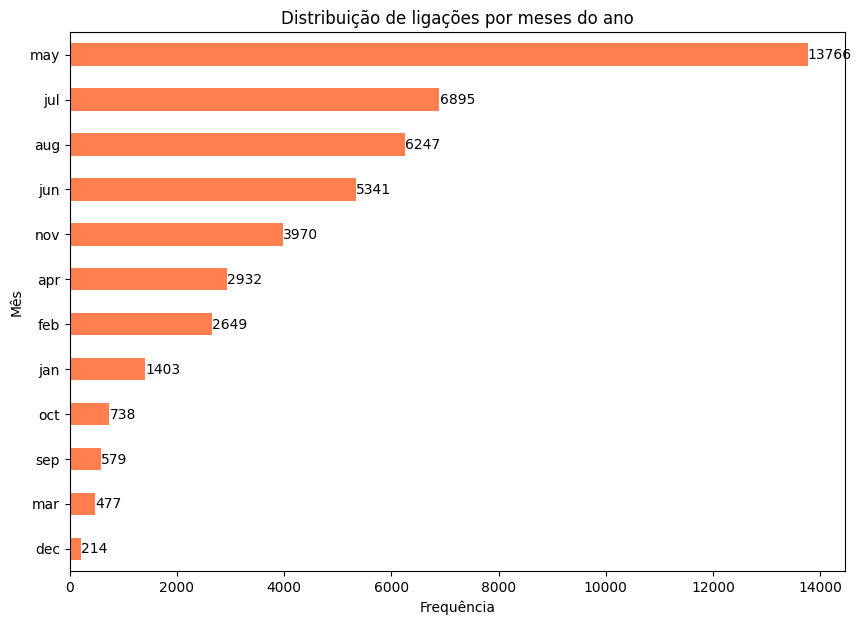

In [107]:
#Gráfico de barras

#Geração do gráfico de barras
ax = dataset['month'].value_counts().plot(kind='barh',
                                    figsize=(10,7),
                                    color='coral',
                                    title="Distribuição de ligações por meses do ano")

#ordena as barras em ordem decrescente
ax.invert_yaxis()

#labels
ax.set_xlabel("Frequência")
ax.set_ylabel("Mês")

#adiciona o valor no final de cada barra
for i, v in enumerate(dataset['month'].value_counts()):
    ax.text(v + 3, i + .1, str(v),
            color = 'black')

Conforme o gráfico acima, o mês que houve maior número de ligações foi em maio. E em dezembro houve o menor número de ligações.

Para a análise do tipo de contato na campanha atual, utilizaremos um gráfico de barras simples:

[]

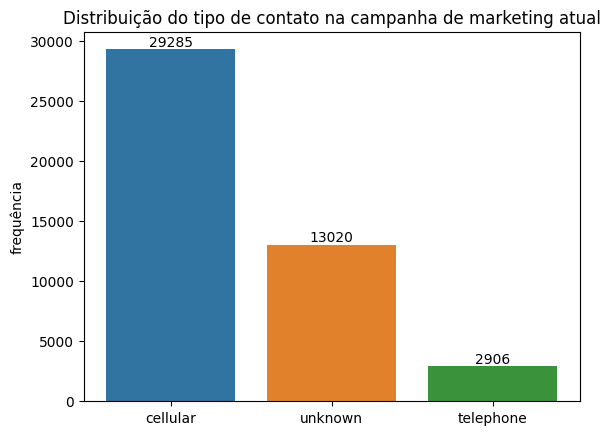

In [108]:
#Gráfico de barras com seaborn
ax= sns.barplot(x=dataset.contact.value_counts().index, y=dataset.contact.value_counts(), dodge=False)

#Adiciona o valor nas colunas
ax.bar_label(ax.containers[0])

#Labels
ax.set_title('Distribuição do tipo de contato na campanha de marketing atual')
ax.set_ylabel('frequência')

ax.plot()

No gráfico acima, podemos visualizar que a forma de contato mais utilizada na campanha é via celular, e a menos utilizada é via telefone.

Para analise da última columa do dataset, poutcome, utilizaremos o mesmo gráfico de barras:

[]

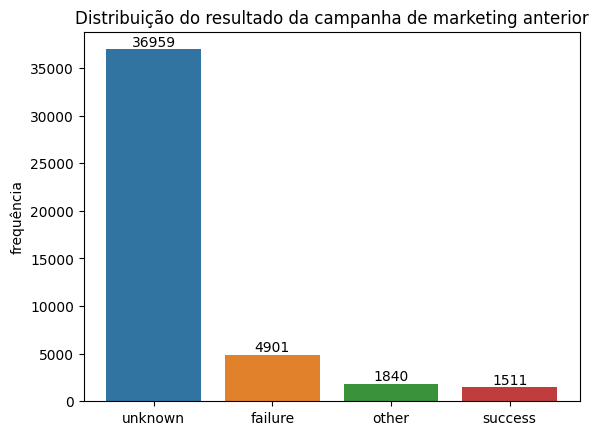

In [109]:
#Gráfico de barras com seaborn
ax= sns.barplot(x=dataset.poutcome.value_counts().index, y=dataset.poutcome.value_counts(), dodge=False)

#Adiciona o valor nas colunas
ax.bar_label(ax.containers[0])

#Labels
ax.set_title('Distribuição do resultado da campanha de marketing anterior')
ax.set_ylabel('frequência')

ax.plot()

A partir do gráfico, percebemos que a grande maioria dos resultados das campanhas anteriores é desconhecido. Com isso, podemos concluir que apenas uma pequena parte dos dados contém informações da relação dos clientes com antigas campanhas de marketing.

### 3.3. Visualizações Multimodais

Nessa seção iremos analisar, a partir visualizações gráficas, as relações entre dois ou mais atributos.

####3.3.1 Análise das tentativas de contato da campanha de marketing atual

Inicialmente, iremos gerar um scatterplot (gráfico de dispersão) para analisarmos a relação entre as variáveis de renda do cliente e duração da chamada:

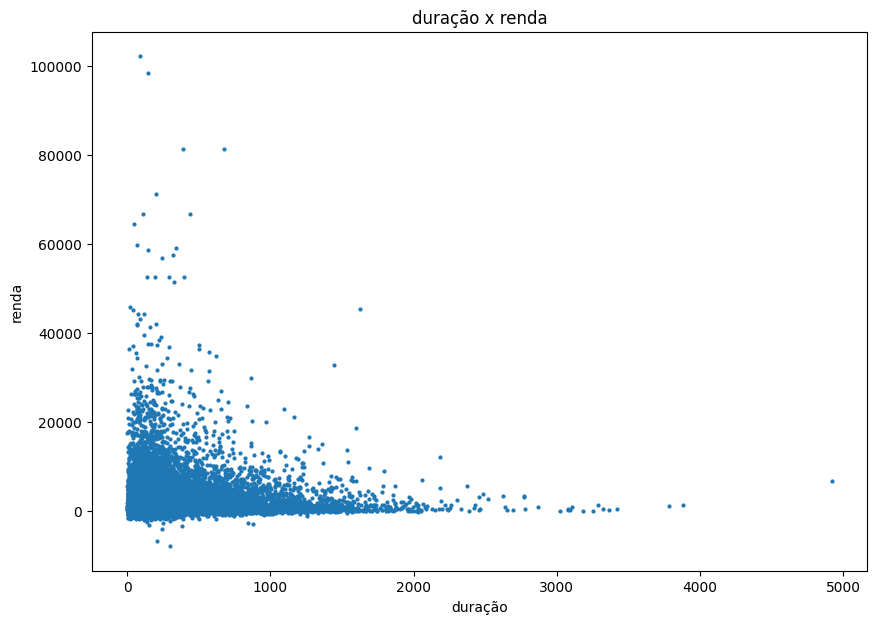

In [110]:
#scatterplot

#ajuste do tamanho
plt.figure(figsize=(10, 7))

#plotando o gráfico de duration x balance
plt.scatter(dataset['duration'], dataset['balance'], s=4)

#incluir título e rótulos no gráfico
plt.title('duração x renda')
plt.xlabel('duração')
plt.ylabel('renda');

Geração de outro scatterplot, para verificar a relação das variáveis de duração da chamada e dia do mês:

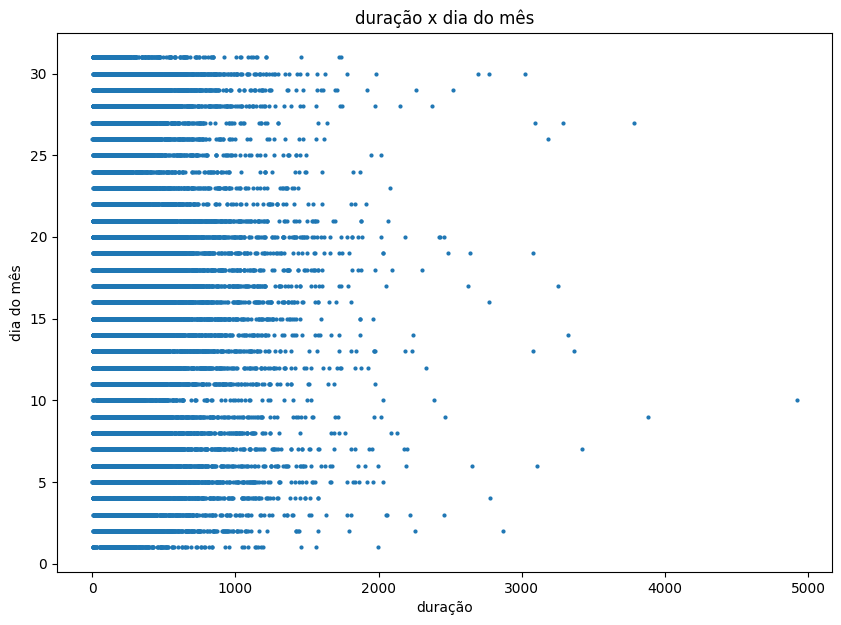

In [111]:
#scatterplot

#ajuste do tamanho
plt.figure(figsize=(10, 7))

#plotando o gráfico de comprimento x largura da sépala
plt.scatter(dataset['duration'], dataset['day'], s=4)

#incluir título e rótulos no gráfico
plt.title('duração x dia do mês')
plt.xlabel('duração')
plt.ylabel('dia do mês');

Em seguida, geraremos um gráfico de linhas para duração das chamadas, agrupado pelo tipo de contato. Neste gráfico, ignoraremos os registros de contatos preenchidos com 'desconhecido', analisando apenas os contatos por telefone e celular.

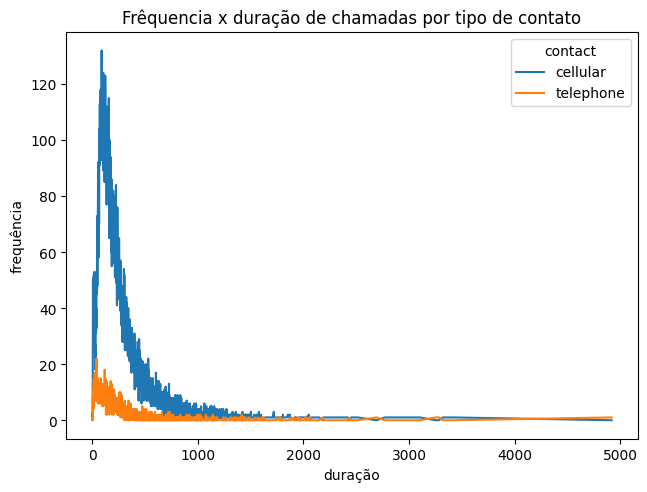

In [112]:
#Gráfico de linhas

#Geração de um dataframe com contatos apenas dos tipos 'celular' e 'telefone'
df_contact = dataset[dataset['contact'].isin(['cellular','telephone'])]

#geração do gráfico
my_pivot = df_contact.pivot_table(index = 'duration',
                          columns = 'contact',
                          fill_value = 0,
                          aggfunc={'contact':len})['contact']

my_pivot.plot.line()
plt.tight_layout()

#labels
plt.title('Frêquencia x duração de chamadas por tipo de contato')
plt.xlabel('duração')
plt.ylabel('frequência');
plt.show()


####3.3.2 Análise dos casos da última campanha de marketing

Nesta seção, iremos analisar alguns dos atributos do dataset agrupados pelo resultado da última campanha de marketing (poutcome). Para isso, iremos gerar dois novos dataframes, selecionando apenas os casos marcados como success (sucesso) e failure (fracasso).

In [113]:
#criação de um dataframe apenas com registros de sucesso
prev_success = dataset[dataset['poutcome'].isin(['success'])]

prev_success.head()

age         job   marital  education default  balance housing loan  \
24080   56  technician   married  secondary      no      589     yes   no   
24165   30      admin.   married  secondary      no      873     yes   no   
24239   48      admin.  divorced  secondary      no      295     yes   no   
24264   49  management   married   tertiary      no       64      no   no   
24435   42  technician   married   tertiary      no    14282     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
24080    unknown   23   oct       518         1    147         2  success  
24165  telephone   12   nov       119         1    167         3  success  
24239   cellular   17   nov       123         1    164         2  success  
24264   cellular   17   nov       208         1    159         1  success  
24435   cellular   17   nov        77         1    103         4  success

In [114]:
#criação de um dataframe apenas com registros de fracasso
prev_failure = dataset[dataset['poutcome'].isin(['failure'])]

prev_failure.head()

age         job   marital  education default  balance housing loan  \
24060   33      admin.   married   tertiary      no      882      no   no   
24064   33    services   married  secondary      no     3444     yes   no   
24077   36  management   married   tertiary      no        0     yes   no   
24127   51      admin.    single  secondary      no     3132      no   no   
24151   33  unemployed  divorced  secondary      no     1005     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
24060  telephone   21   oct        39         1    151         3  failure  
24064  telephone   21   oct       144         1     91         4  failure  
24077  telephone   23   oct       140         1    143         3  failure  
24127  telephone    5   nov       449         1    176         1  failure  
24151  telephone   10   nov       175         1    174         2  failure

A seguir, iremos gerar histogramas para a distruibuição de idade dos clientes, um para cada dataset.

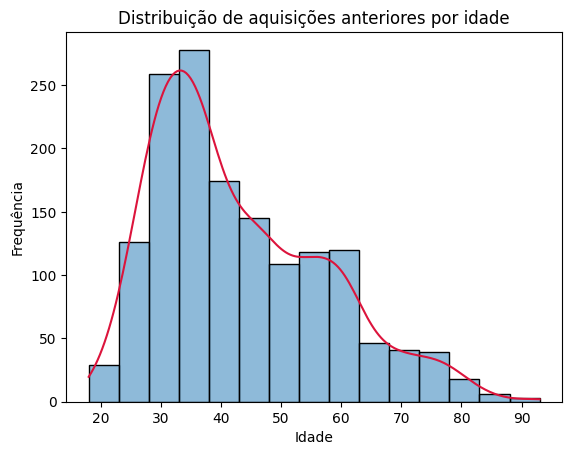

In [115]:
#Histograma

#incluindo título do gráfico e lendenda
plt.title('Distribuição de aquisições anteriores por idade')
plt.ylabel('Frequência')
plt.xlabel('Idade');

#selecionando apenas a coluna age
X = prev_success['age']

ax = sns.histplot(X, kde=True, bins=15)
ax.lines[0].set_color('crimson')
plt.show()


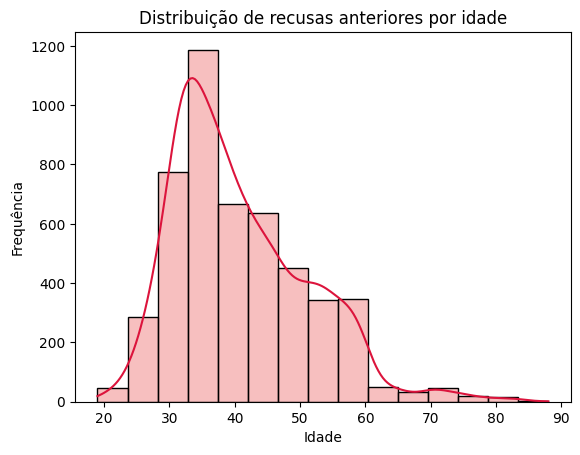

In [116]:
#incluindo título do gráfico e lendenda
plt.title('Distribuição de recusas anteriores por idade')
plt.ylabel('Frequência')
plt.xlabel('Idade');

#selecionando apenas a coluna age
X = prev_failure['age']

ax = sns.histplot(X, kde=True, bins=15, color='lightcoral')
ax.lines[0].set_color('crimson')
plt.show()


Como podemos observar, a curva de densidade dos dois histogramas são semelhantes. Porém, é notável um volume maior de aquisições anteriores de clientes com idades entre 65 a 80 anos.

Para a próxima análise, geraremos gráficos contendo informações sobre dívidas/crédito dos clientes para cada dataset:

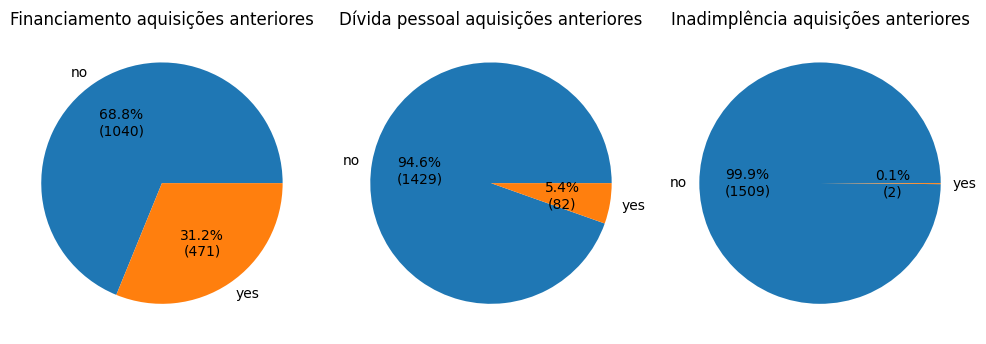

In [117]:
#Gráfico de barras

#Geração do gráfico de barras
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


#criação de dataframes indivíduais para os atributos housing, loan e default
df_housing = prev_success['housing'].value_counts()
df_loan = prev_success['loan'].value_counts()
df_default = prev_success['default'].value_counts()

#configurando um grupo de subplots de um grid de 1 linha e 3 colunas e também o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

#geração dos gráficos
axes[0].pie(df_housing,labels = df_housing.index, autopct=autopct_format(df_housing))
axes[0].set_title('Financiamento aquisições anteriores')

axes[1].pie(df_loan,labels = df_loan.index, autopct=autopct_format(df_loan))
axes[1].set_title('Dívida pessoal aquisições anteriores')

axes[2].pie(df_default,labels = df_default.index, autopct=autopct_format(df_default))
axes[2].set_title('Inadimplência aquisições anteriores')

fig.tight_layout()



De acordo com os gráficos acima, dos clientes que adiquiriram o produto da última campanha de marketing, 31,2% possuem financiamento imobiliário, 5,4% possuem dívida pessoal e apenas 0,1% estão em inadimplência.

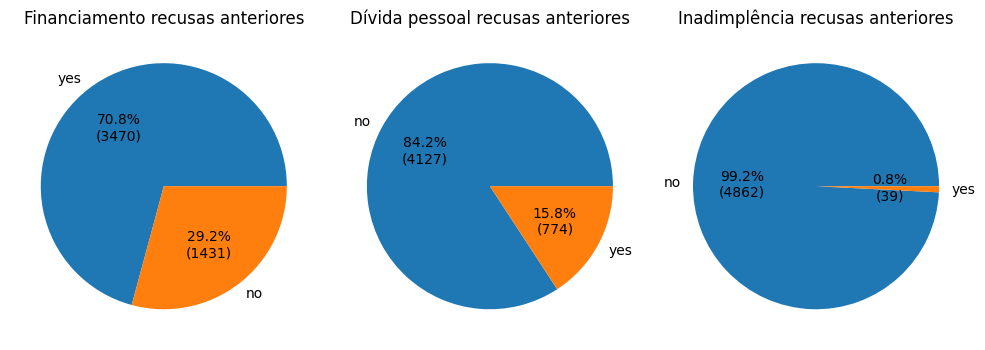

In [118]:
#Gráfico de barras

#Geração do gráfico de barras
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


#criação de dataframes indivíduais para os atributos housing, loan e default
df_housing = prev_failure['housing'].value_counts()
df_loan = prev_failure['loan'].value_counts()
df_default = prev_failure['default'].value_counts()

#configurando um grupo de subplots de um grid de 1 linha e 3 colunas e também o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

#geração dos gráficos
axes[0].pie(df_housing,labels = df_housing.index, autopct=autopct_format(df_housing))
axes[0].set_title('Financiamento recusas anteriores')

axes[1].pie(df_loan,labels = df_loan.index, autopct=autopct_format(df_loan))
axes[1].set_title('Dívida pessoal recusas anteriores')

axes[2].pie(df_default,labels = df_default.index, autopct=autopct_format(df_default))
axes[2].set_title('Inadimplência recusas anteriores')

fig.tight_layout()



Diferente dos casos de aquisições, os gráficos acima mostram que, dos clientes que recusaram o produto da última campanha de marketing, 70,8% possuem financimaneto imobiliário, 15,8% possuem dívida pessoal e 0,8% estão em inadimplência.
A diferença mais marcante entre os dois conjuntos de gráficos é que a porcentagem de recusas é muito maior de clientes que possuem financimaneto imobiliário.

Por fim, iremos analisar a área de atuação dos clientes dos dois conjuntos de dados:

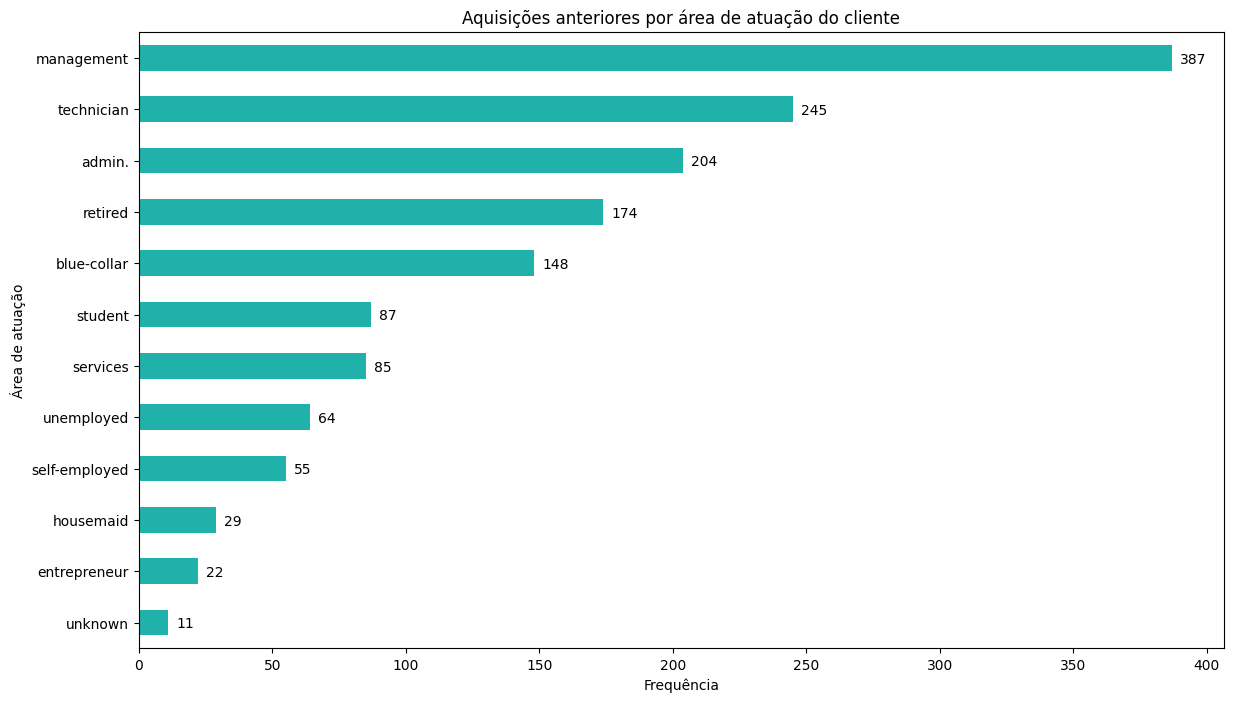

In [119]:
#gera o gráfico de barras horizontal
ax = prev_success['job'].value_counts().plot(kind='barh',
                                    figsize=(14,8),
                                    color='lightseagreen',
                                    title="Aquisições anteriores por área de atuação do cliente")

#ordena as barras em ordem decrescente
ax.invert_yaxis()

#labels
ax.set_xlabel("Frequência")
ax.set_ylabel("Área de atuação")

#adiciona o valor no final de cada barra
for i, v in enumerate(prev_success['job'].value_counts()):
    ax.text(v + 3, i + .1, str(v),
            color = 'black')

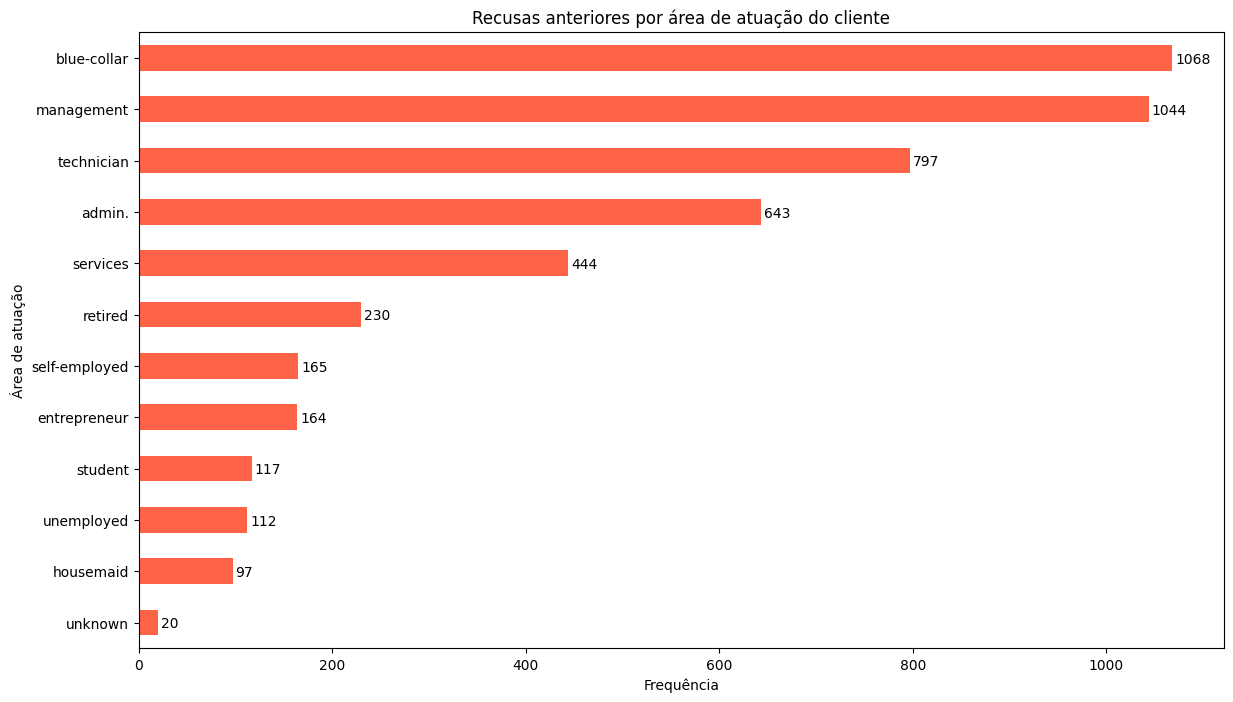

In [120]:
#gera o gráfico de barras horizontal
ax = prev_failure['job'].value_counts().plot(kind='barh',
                                    figsize=(14,8),
                                    color='tomato',
                                    title="Recusas anteriores por área de atuação do cliente")

#ordena as barras em ordem decrescente
ax.invert_yaxis()

#labels
ax.set_xlabel("Frequência")
ax.set_ylabel("Área de atuação")

#adiciona o valor no final de cada barra
for i, v in enumerate(prev_failure['job'].value_counts()):
    ax.text(v + 3, i + .1, str(v),
            color = 'black')

A partir dos gráficos, observamos que a área de atuação dos clientes que mais adiquiriram produtos na campanha de marketing anterior foram: management (gestão), technician (técnico) e admin (adiministração).

E os clientes com maiores taxa de recusa são das áreas: blue-collar (colarinho azul), management (gestão) e technician (técnico).

####3.3.3 Demais análises

A seguir, iremos gerar matriz de correlação dos atributos do dataset.

Uma matriz de correlação é uma tabela que mostra os coeficientes de correlação entre muitas variáveis. Cada célula da matriz representa a correlação entre duas variáveis específicas. A correlação é uma medida estatística que indica a extensão em que duas variáveis estão relacionadas entre si. Os valores típicos de correlação variam de -1 a 1:

- 1: Correlação positiva perfeita
- 0: Ausência de correlação
--1: Correlação negativa perfeita



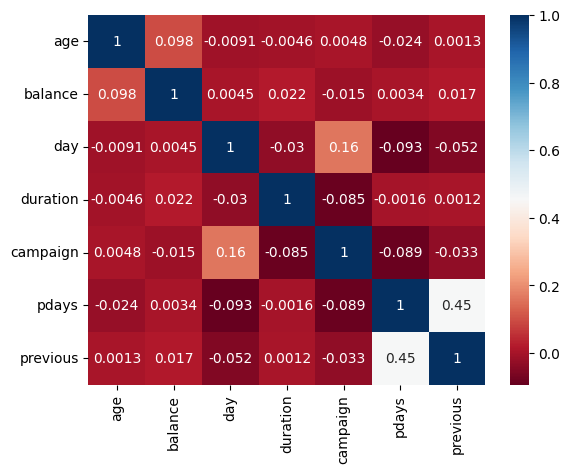

In [121]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

A seguir, iremos gerar um scatter plot para cada par de variáveis do dataset.

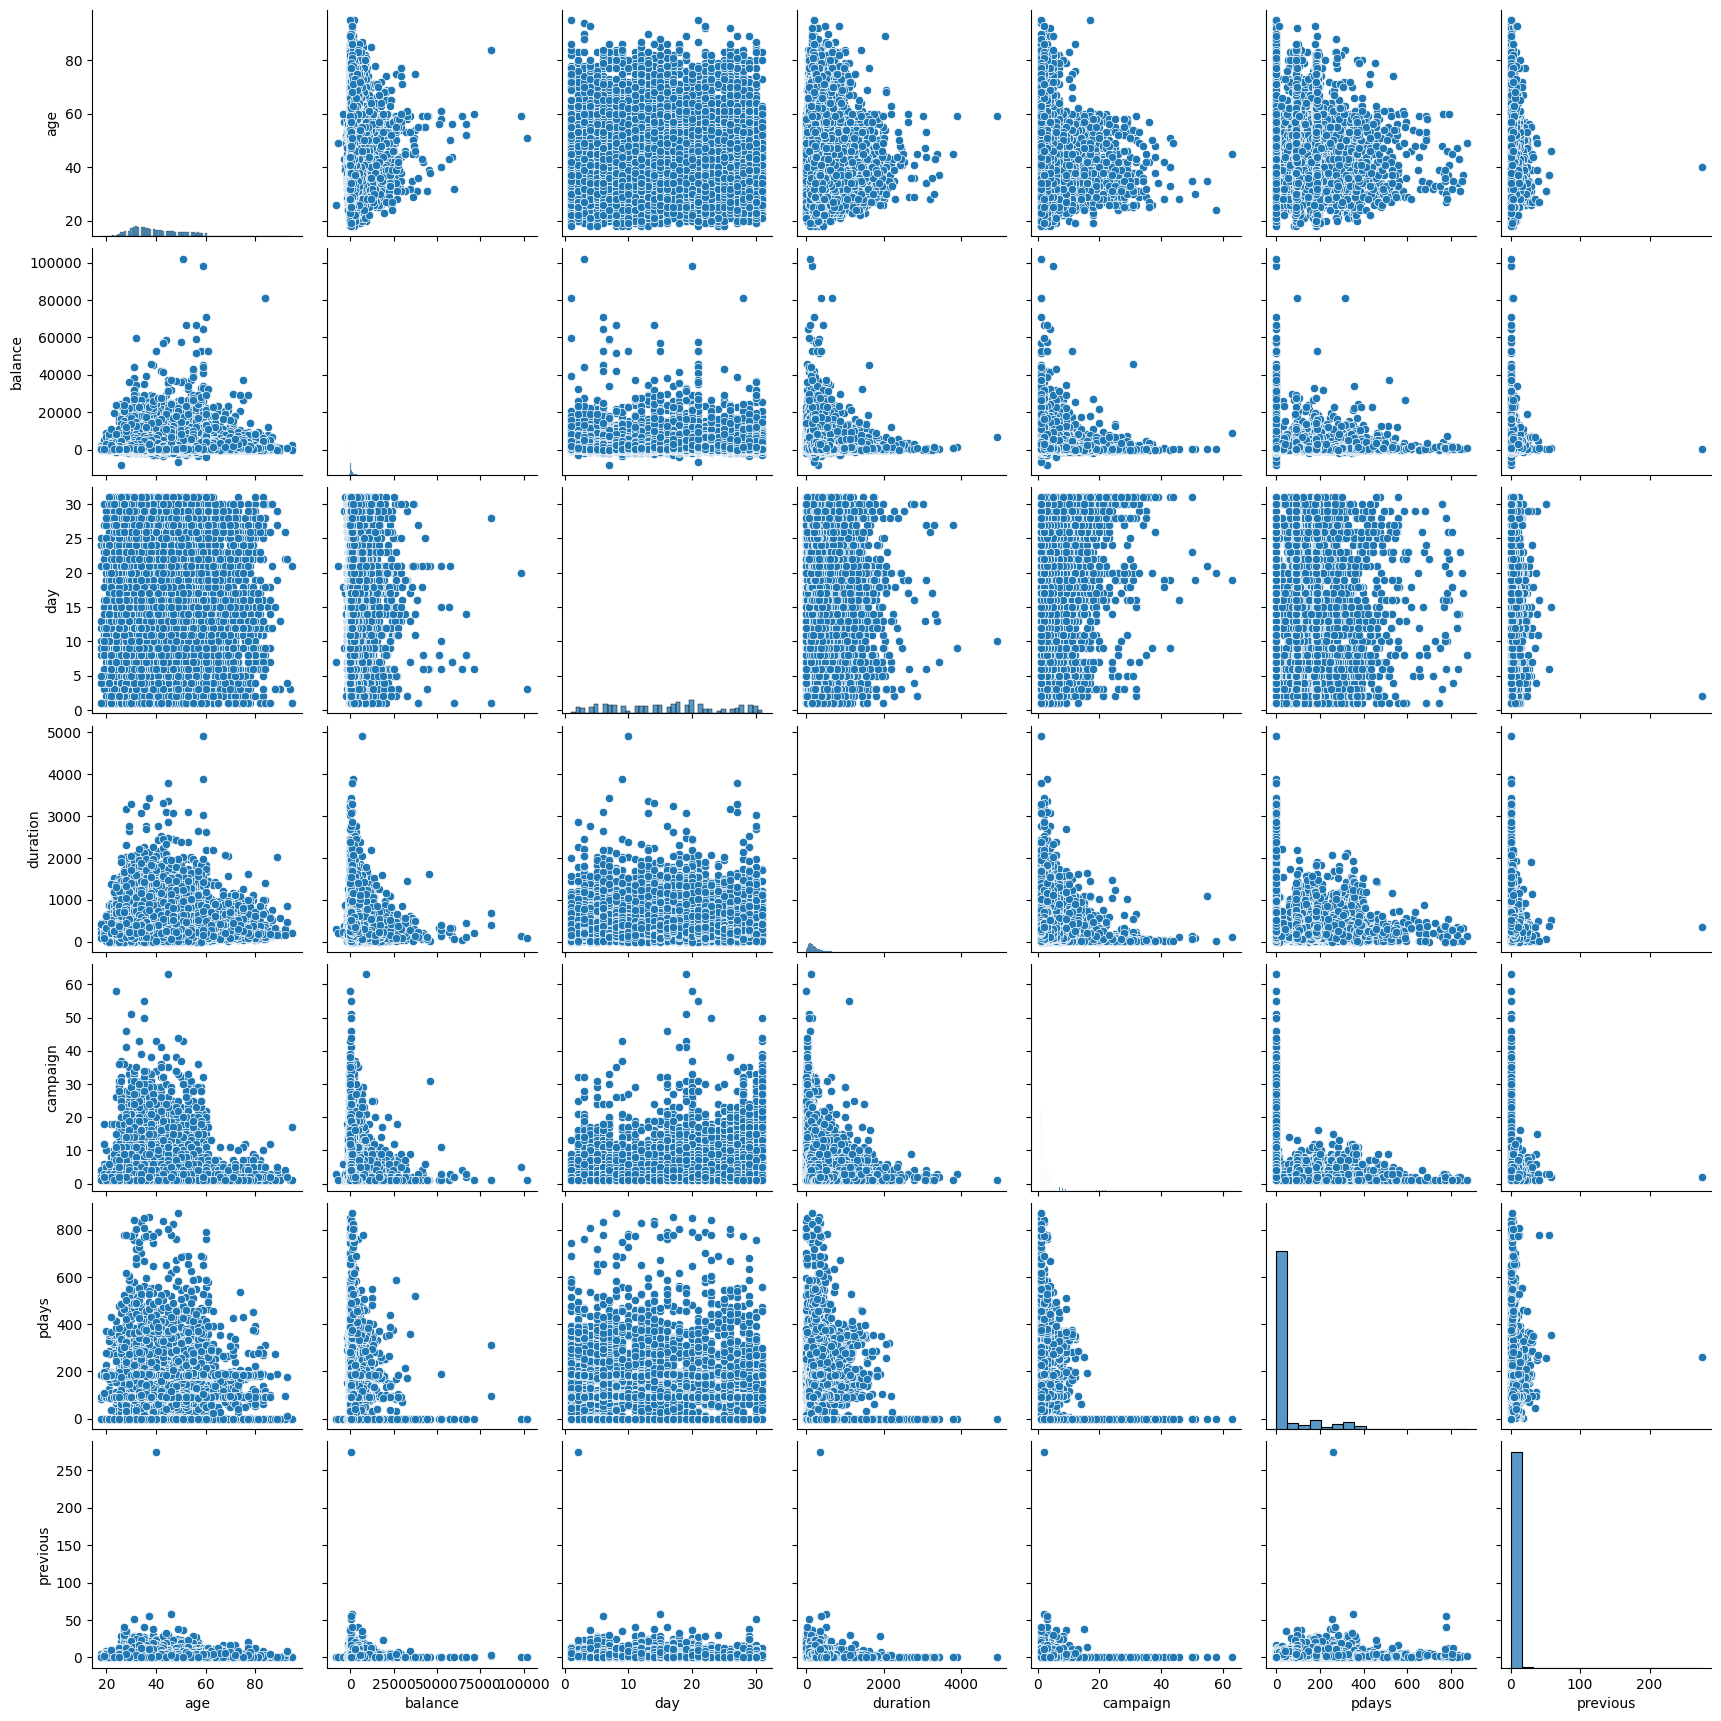

In [122]:
# Scatter Plot com Seaborn
sns.pairplot(dataset)


E por fim, criaremos o mesmo gráfico de dispersão acima, só que agrupado pelo atributo poutcome (resultado da última campanha).

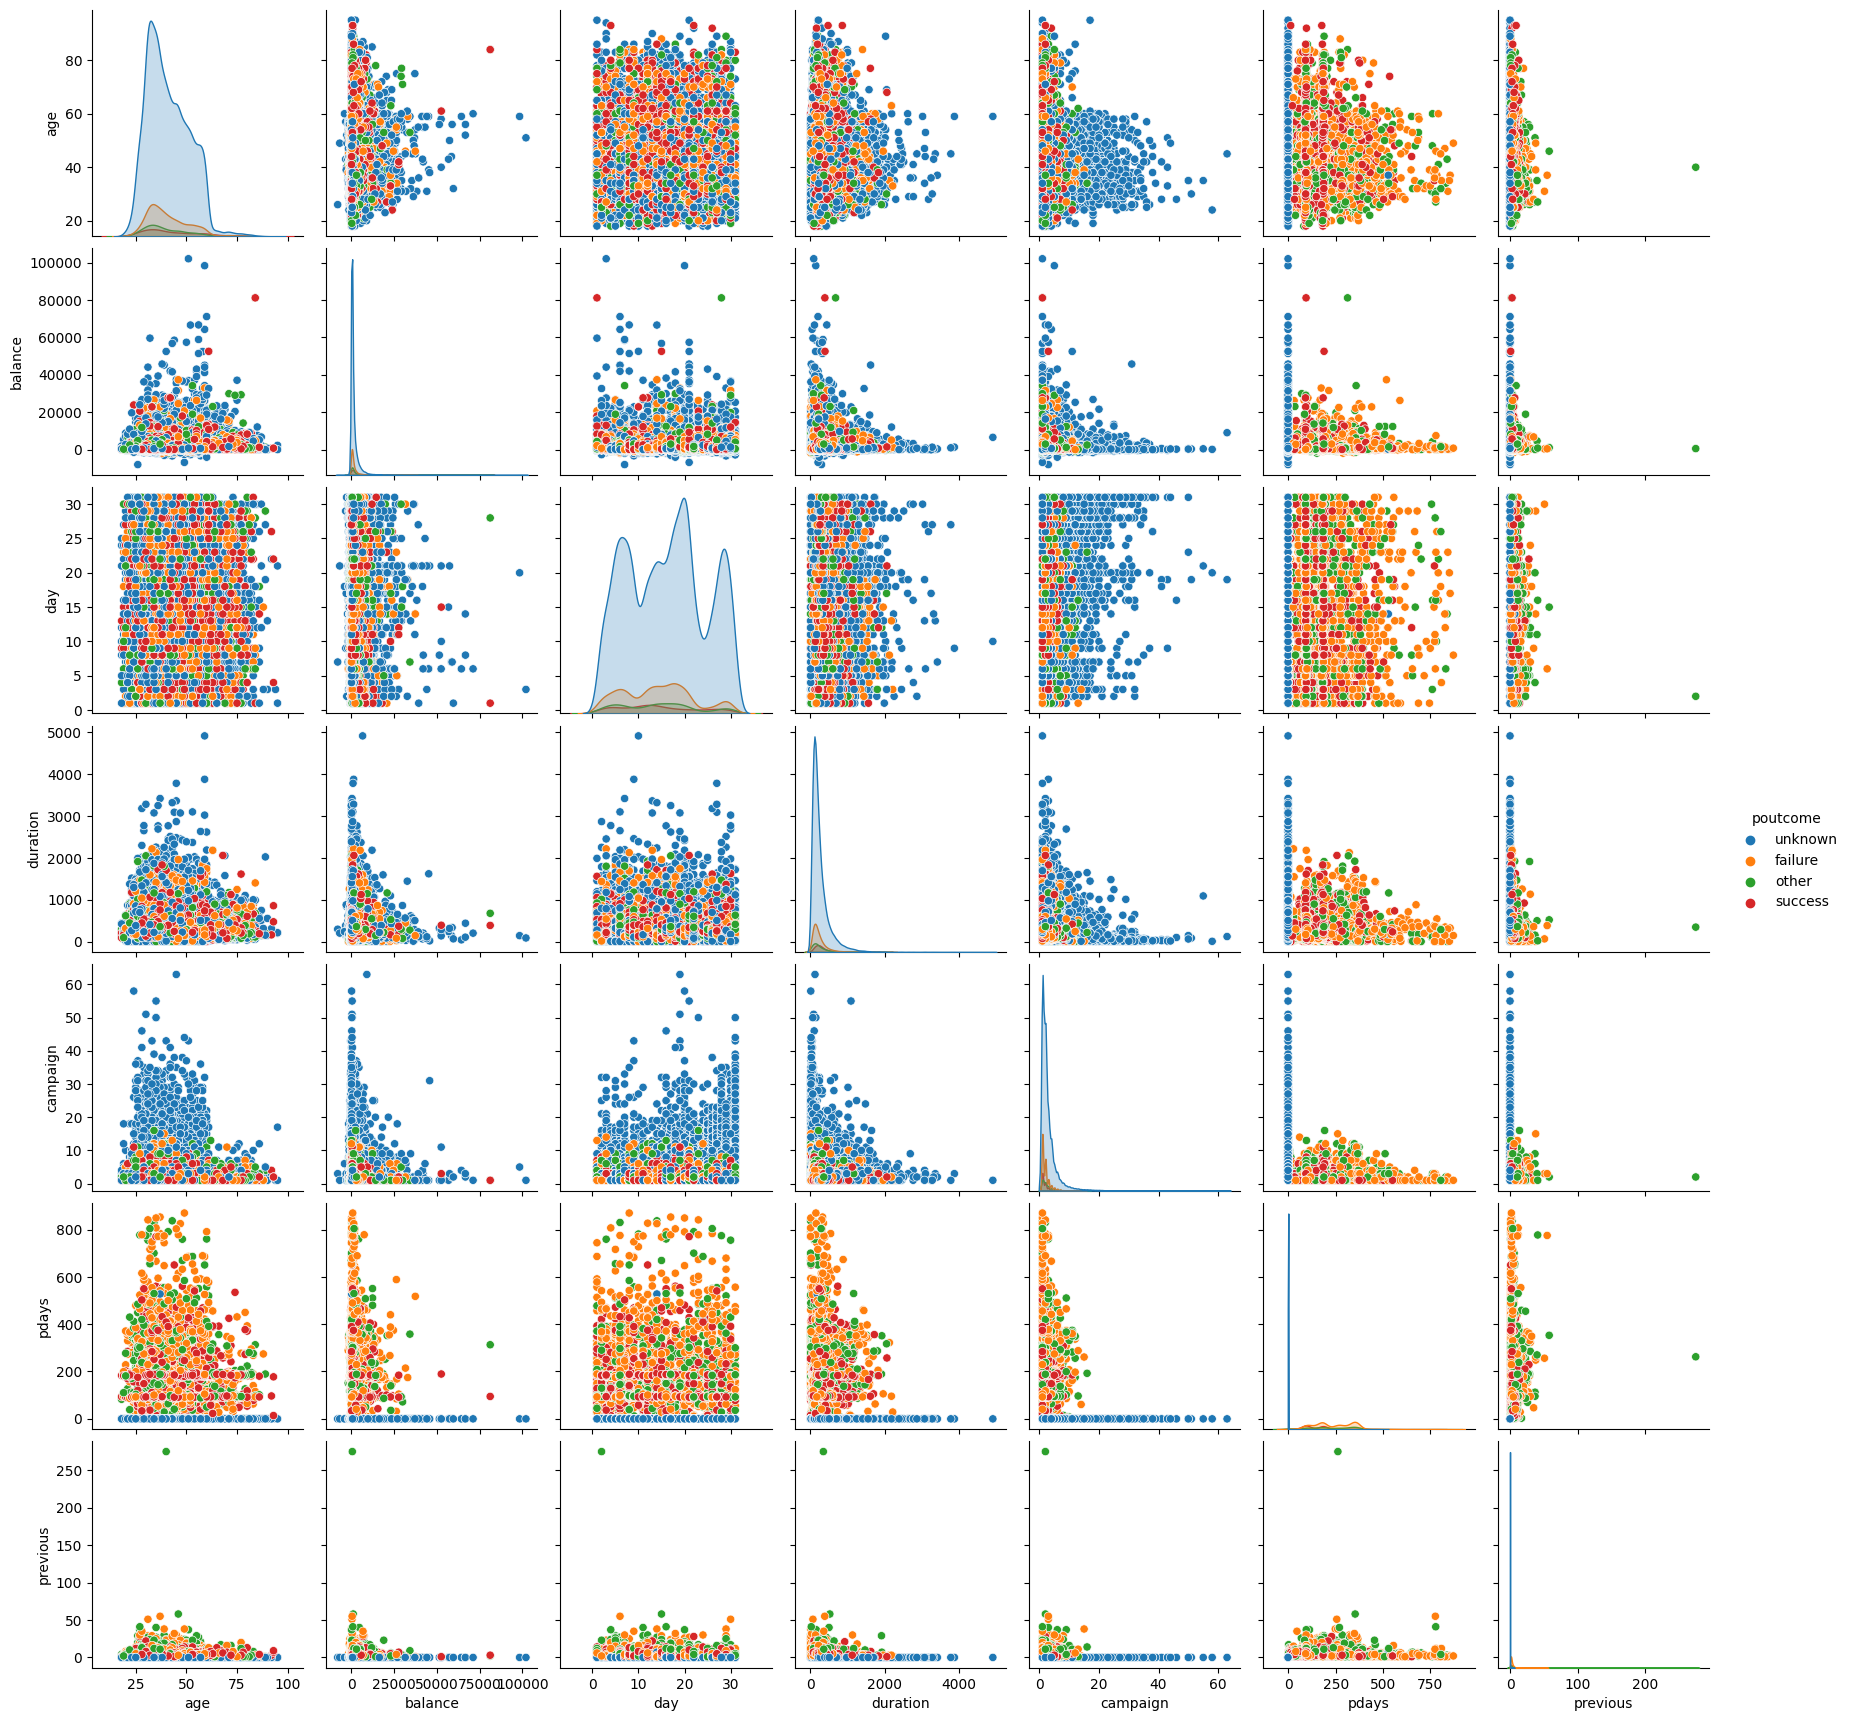

In [123]:
# Scatter Plot com Seaborn
sns.pairplot(dataset, hue = "poutcome", height = 2.5);


## 4. Pré-Processamento de Dados

Na etapa de pré-processamento, iremos realizar diversas operações de limpeza, tratamento, transformações e preparação dos dados.

### 4.1 Tratamento de Missings e Limpeza

A primeira operação de pré-processamento que será realizada é a verificação da existência de missings no dataset.

Inicialmente, sabemos que o dataset trabalhado não possui missings aparentes, porém ele possui valores como '0' e 'desconhecido' em alguns de seus atributos. Em seguida, iremos criar uma nova visão do dataset para este tratamento.

In [124]:
#verificando nulls no dataset
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

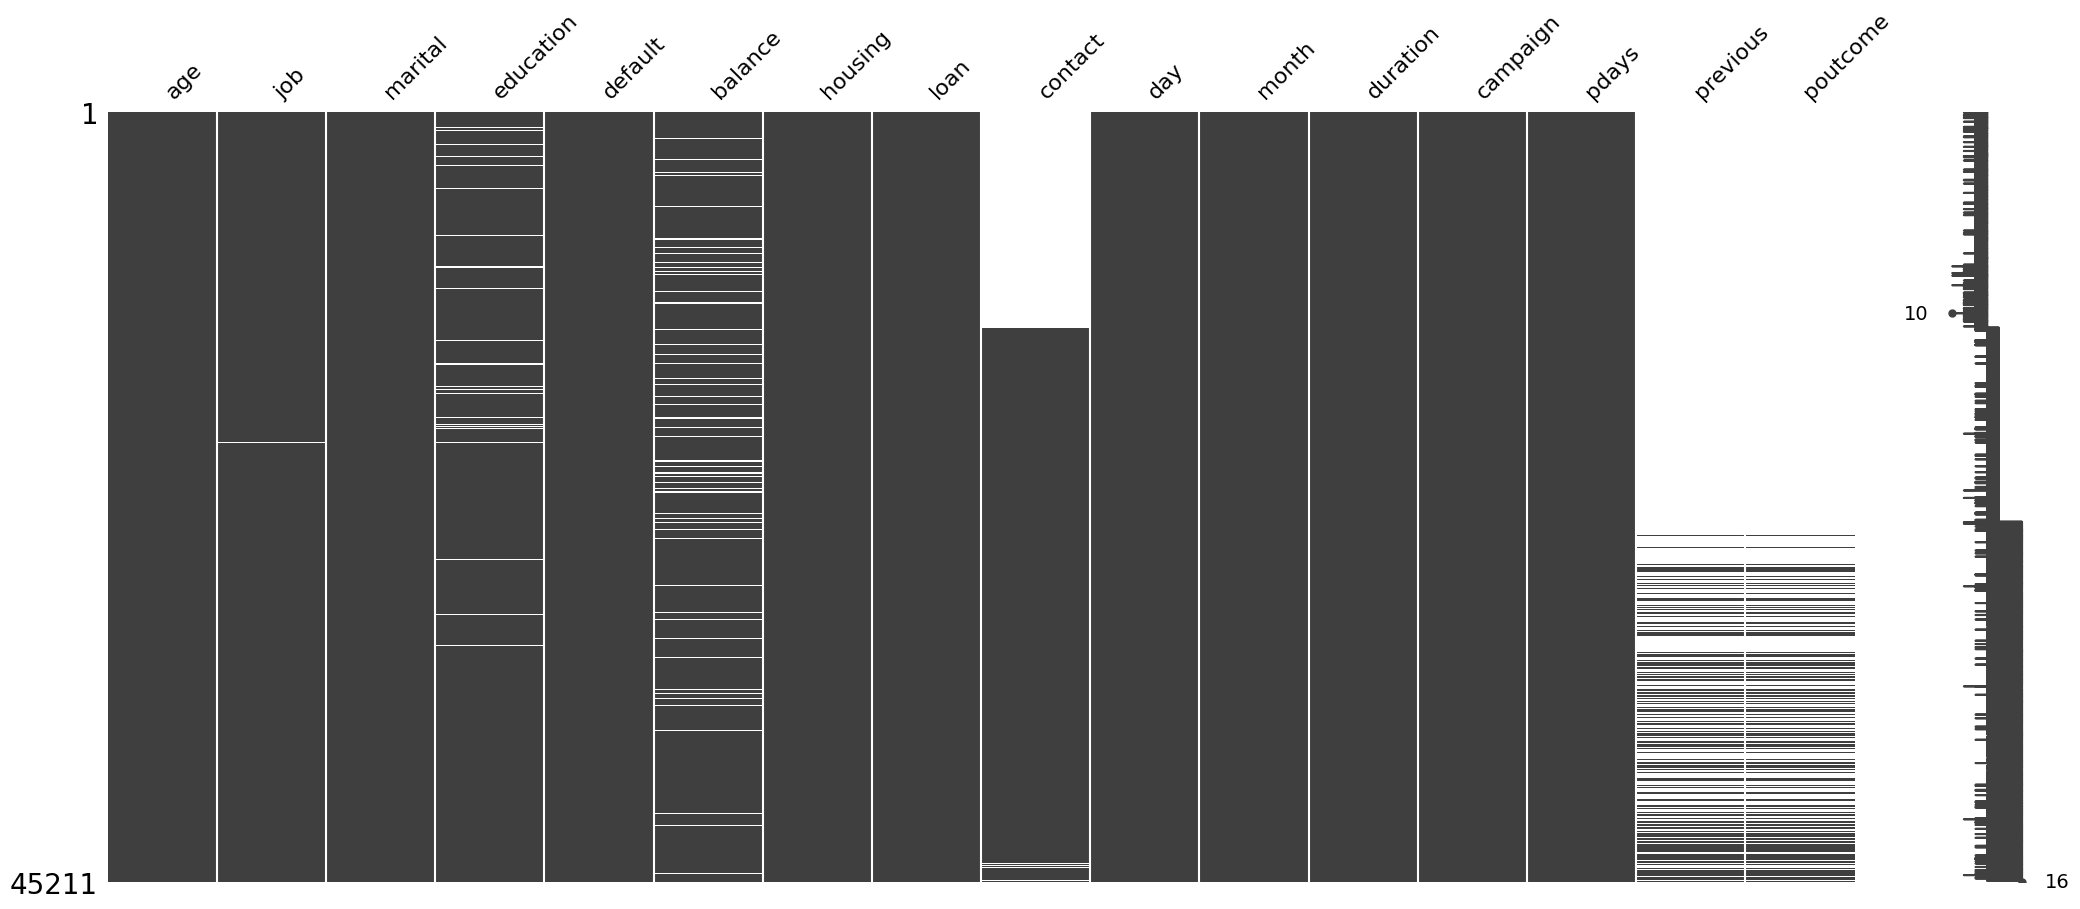

In [125]:
# salvando um novo dataset para tratamento de missings
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# substituindo unknown por NaN
datasetSemMissings.replace('unknown', np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [126]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance       3514
housing          0
loan             0
contact      13020
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome     36959
dtype: int64

Após a geração de um novo dataset, o qual consideramos os valores '0' e 'desconhecido' como missings, podemos observar valores faltantes em diversas colunas.

A seguir, iremos analisar qual desses missings aparentes realmente representam valores faltantes, e também selecionar o melhor tratamento para cada um deles.  

<Axes: >

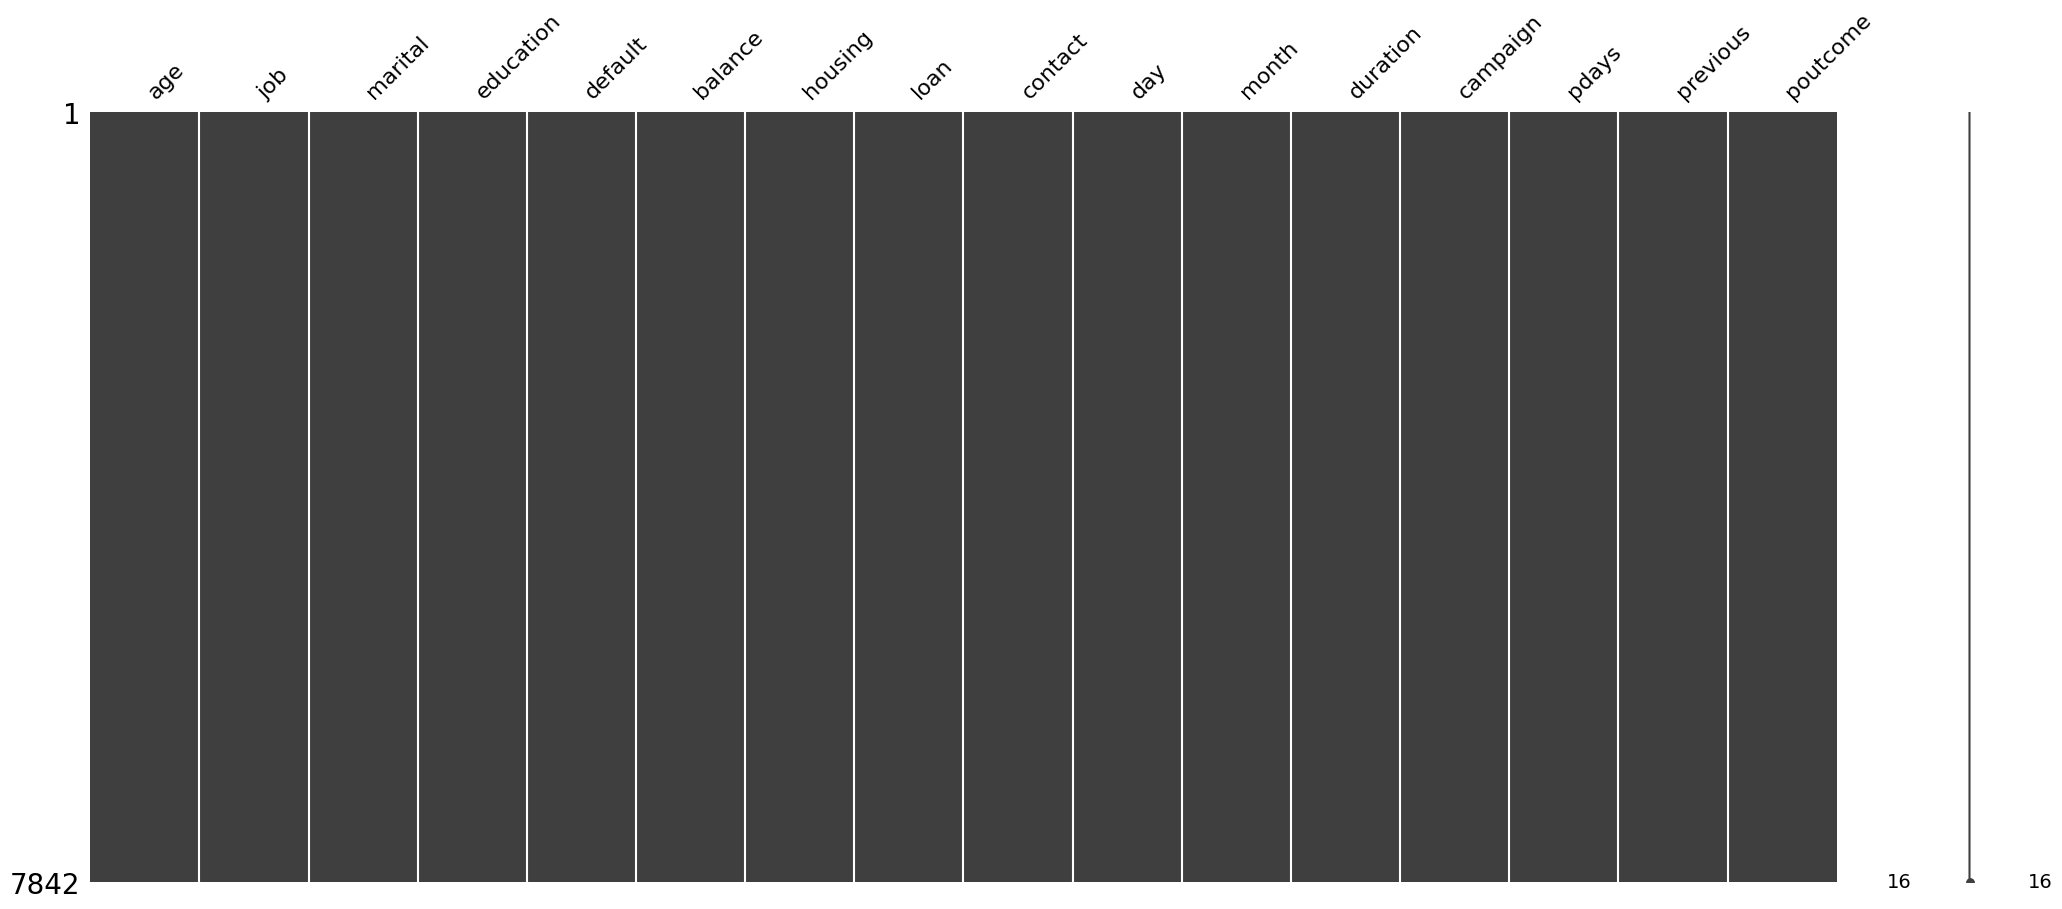

In [127]:
# substituindo os NaN de 'previous' por 0 (valor original), pois zero representa não foi entrado em contato com o cliente durante a campanha atual
datasetSemMissings['previous'].fillna(0, inplace=True)

# substituindo os NaN de 'balance' por 0 (valor original), pois é possível que o cliente não possua saldo em sua conta bancária
datasetSemMissings['balance'].fillna(0, inplace=True)

#deletando as linhas em que as colunas 'job', 'education', 'contact' e 'poutcome' estão preenchidas com NaN
datasetSemMissings.dropna(subset=['job'], inplace=True)
datasetSemMissings.dropna(subset=['education'], inplace=True)
datasetSemMissings.dropna(subset=['contact'], inplace=True)
datasetSemMissings.dropna(subset=['poutcome'], inplace=True)


# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [128]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Para o tratamento das colunas 'previous' e 'balance', retornamos ao seus valores originais (zero), pois são valores válidos para a nossa análise.

Por outro lado, para os registros das colunas 'job', 'education', 'contact' e 'poutcome' preenchidos como 'desconhecido', decidimos remover completamente as linhas, pois não há uma forma de preever seu valor original desses missings.

Após o tratamento, nota-se que o dataset saiu de 45211 registros para 7842 registros, sendo uma diminuição considerável no volume de dados.
**Devemos também levar em conta de que, dependendo da analise a ser realizada, os registros com informações NaN podem ser considerados, pois as demais colunas desses registros possuem informações válidas.**

###4.2 Discretização

A discretização consiste em transformar um atributo contínuo em categorias ordinais. Para o nosso dataset, faremos a discretização das colunas:

- balance (saldo) dividido em: negativo, baixo, médio, alto e muito alto.
- duration (duração) dividido em: muito curta, curta, média e longa.

A definição dos valores para a discretização foi baseada no resumo estatístico de cada variável, e está descrita nos comentários dos códigos abaixo.


In [129]:
# salvando um novo dataset
col = list(dataset.columns)
datasetDisc = dataset[col[:]]

#cria um novo atributo Saldo_discretizado
#categoriza o saldo seguindo o parâmento:
# de -10000 a -1 - negativo
# de 0 a 100 - baixo
# de 100 a 1000 - médio
# de 1000 a 10000 - alto
# de 10000 a 10000000 - muito alto
datasetDisc['Saldo_discretizado'] = pd.cut( x= datasetDisc['balance'],
                                          bins = [-10000, -1, 100, 1000, 10000, 10000000],
                                          labels = ["Negativo", "Baixo", "Médio", "Alto", "Muito alto"])

datasetDisc.head(10)



age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   
7  unknown    5   may       380         1     -1         0  unknown   
8  unknown    5   may        50         1     -1         0  unknown   
9  unknown    5   may        55         1     -1         0  unknown   

  Saldo_discretizado  
0               Alto  
1              Baixo  
2              Baixo  
3               Alto  
4              Baixo  
5              Médio  
6              Médio  
7              Baixo  
8              Médio  
9              Médio

Acima, ao final do dataset, podemos visualizar o novo campo  'Saldo_discretizado', o qual categoriza o saldo nos grupos descritos.

In [130]:
#cria um novo atributo Duracao_discretizada
#categoriza o saldo seguindo o parâmento:
# de 0 a 20 - muito curta
# de 20 a 100 - curta
# de 100 a 400 - média
# de 400 a 10000 - longa
datasetDisc['Duracao_discretizada'] = pd.cut( x= datasetDisc['duration'],
                                          bins = [0, 20, 100, 400, 10000],
                                          labels = ["Muito curta", "Curta", "Média", "Longa"])

datasetDisc.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   
5  unknown    5   may       139         1     -1         0  unknown   
6  unknown    5   may       217         1     -1         0  unknown   
7  unknown    5   may       380         1     -1         0  unknown   
8  unknown    5   may        50         1     -1         0  unknown   
9  unknown    5   may        55         1     -1         0  unknown   

  Saldo_discretizado Duracao_discretizada  
0               Alto                Média  
1              Baixo                Média  
2              Baixo                Curta  
3               Alto                Curta  
4              Baixo                Média  
5              Médio                Média  
6              Médio                Média  
7              Baixo                Média  
8              Médio                Curta  
9              Médio                Curta

Acima, ao final do dataset, podemos visualizar o novo campo 'Duracao_discretizada', o qual categoriza a duração nos grupos descritos.



###4.3 One-hot encoding

One-hot encoding é uma técnica usada em ciência de dados e aprendizado de máquina para lidar com variáveis categóricas. Quando temos variáveis categóricas em um conjunto de dados, muitos algoritmos de machine learning requerem que essas variáveis sejam convertidas em um formato numérico para serem utilizadas de maneira eficaz. O One-hot encoding consiste em transformar atributos categóricos nominais (ou seja, sem ordenação existente entre eles) em “colunas binárias”.

Para o  projeto, a transformação será feita para a coluna marital (estado cívil) e education (nível de escolaridade) do dataset.

In [131]:
#verificando a quantidade de valores possíveis para estes campos
print(dataset['marital'].unique())
print(dataset['education'].unique())


['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']


In [132]:
#utilizando a função get_dummies() do pandas para o one-hot-encoded
one_hot_encoded_dataset = pd.get_dummies(dataset, columns = ['marital', 'education'])

print(one_hot_encoded_dataset)

       age           job default  balance housing loan    contact  day month  \
0       58    management      no     2143     yes   no    unknown    5   may   
1       44    technician      no       29     yes   no    unknown    5   may   
2       33  entrepreneur      no        2     yes  yes    unknown    5   may   
3       47   blue-collar      no     1506     yes   no    unknown    5   may   
4       33       unknown      no        1      no   no    unknown    5   may   
...    ...           ...     ...      ...     ...  ...        ...  ...   ...   
45206   51    technician      no      825      no   no   cellular   17   nov   
45207   71       retired      no     1729      no   no   cellular   17   nov   
45208   72       retired      no     5715      no   no   cellular   17   nov   
45209   57   blue-collar      no      668      no   no  telephone   17   nov   
45210   37  entrepreneur      no     2971      no   no   cellular   17   nov   

       duration  ...  pdays  previous  

Ao final do dataset, podemos observar as colunas binárias dos atributos categóricos selecionados.

Como o problema abordado no projeto trata-se de um problema de aprendizado não supervisionado, não foi feita a separação em conjunto de treino e conjunto de teste.

# 4. Conclusão

Para o desenvolvimento do MPV, foi selecionado um conjunto de dados e trabalhado desde definição do problema até a etapa de pré-processamento de dados.

Ao longo deste projeto, foi possível analisar, tanto de forma estatística como gráfica, diversas informações sobre o dataset de estudo, o que nos mostra como a análise exploratória contribui para a compreensão mais profunda dos dados e oferece insights valiosos para o cientísta de dados.

Também percebemos a importância do tratamento dos dados na fase de pré-processamento, realizando operações de limpeza, tratamento e preparação dos dados, a fim de refinar os dados e permitir analises mais complexas.